In [1]:
# Predict the results of football matches of the Spanish First Division League
# Eduardo Sthory

In [2]:
# Libraries
# import warnings filter
import warnings
from sklearn.exceptions import DataConversionWarning
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=DeprecationWarning)
simplefilter(action='ignore', category=UserWarning)
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

import numpy as np
import pandas as pd
from IPython.display import display
from Functions import result_to_numeric, best_features
#from Functions.ipynb import result_to_numeric, best_features
import Functions 
from Features_Engineer import features_engineer
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.preprocessing import scale
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sea

From: http://football-data.co.uk
Name of the results dataset fields SOURCE:

    - SP1-2009.csv
    - SP1-2010.csv
    - SP1-2011.csv
    - SP1-2012.csv
    - SP1-2013.csv   
    - SP1-2014.csv
    - SP1-2015.csv
    - SP1-2016.csv
    - SP1-2017.csv
    - SP1-2018.csv
 
 Fields:
 
 - Div = League Division
 - Date = Match Date (dd/mm/yy)
 - HomeTeam = Home Team
 - AwayTeam = Away Team
 - FTHG and HG = Full Time Home Team Goals
 - FTAG and AG = Full Time Away Team Goals
 - FTR and Res = Full Time Result (H=Home Win, D=Draw, A=Away Win)
 - HTHG = Half Time Home Team Goals
 - HTAG = Half Time Away Team Goals
 - HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)
 
 Match Statistics 
 
 - HS = Home Team Shots
 - AS = Away Team Shots
 - HST = Home Team Shots on Target
 - AST = Away Team Shots on Target
 - HC = Home Team Corners
 - AC = Away Team Corners
 - HF = Home Team Fouls Committed
 - AF = Away Team Fouls Committed

In [3]:
# Load 10 last Season 2009-2018
data1 = pd.read_csv('SP1-2009.csv')
data2 = pd.read_csv('SP1-2010.csv')
data3 = pd.read_csv('SP1-2011.csv')
data4 = pd.read_csv('SP1-2012.csv')
data5 = pd.read_csv('SP1-2013.csv')
data6 = pd.read_csv('SP1-2014.csv')
data7 = pd.read_csv('SP1-2015.csv')
data8 = pd.read_csv('SP1-2016.csv')
data9 = pd.read_csv('SP1-2017.csv')
data10 = pd.read_csv('SP1-2018.csv')

# Eliminate unnecessary columns
data1 = data1.iloc[:,:18]
data2 = data2.iloc[:,:18]
data3 = data3.iloc[:,:18]
data4 = data4.iloc[:,:18]
data5 = data5.iloc[:,:18]
data6 = data6.iloc[:,:18]
data7 = data7.iloc[:,:18]
data8 = data8.iloc[:,:18]
data9 = data9.iloc[:,:18]
data10 = data10.iloc[:,:18]

# Drop Div, Date and others
data1 = data1.drop(['Div','Date','HTHG','HTAG','HTR'],axis=1)
data2 = data2.drop(['Div','Date','HTHG','HTAG','HTR'],axis=1)
data3 = data3.drop(['Div','Date','HTHG','HTAG','HTR'],axis=1)
data4 = data4.drop(['Div','Date','HTHG','HTAG','HTR'],axis=1)
data5 = data5.drop(['Div','Date','HTHG','HTAG','HTR'],axis=1)
data6 = data6.drop(['Div','Date','HTHG','HTAG','HTR'],axis=1)
data7 = data7.drop(['Div','Date','HTHG','HTAG','HTR'],axis=1)
data8 = data8.drop(['Div','Date','HTHG','HTAG','HTR'],axis=1)
data9 = data9.drop(['Div','Date','HTHG','HTAG','HTR'],axis=1)
data10 = data10.drop(['Div','Date','HTHG','HTAG','HTR'],axis=1)

# Transform FTR (Target)
data1['FTR'] = data1.apply(lambda row: result_to_numeric(row),axis=1)
data2['FTR'] = data2.apply(lambda row: result_to_numeric(row),axis=1)
data3['FTR'] = data3.apply(lambda row: result_to_numeric(row),axis=1)
data4['FTR'] = data4.apply(lambda row: result_to_numeric(row),axis=1)
data5['FTR'] = data5.apply(lambda row: result_to_numeric(row),axis=1)
data6['FTR'] = data6.apply(lambda row: result_to_numeric(row),axis=1)
data7['FTR'] = data7.apply(lambda row: result_to_numeric(row),axis=1)
data8['FTR'] = data8.apply(lambda row: result_to_numeric(row),axis=1)
data9['FTR'] = data9.apply(lambda row: result_to_numeric(row),axis=1)
data10['FTR'] = data10.apply(lambda row: result_to_numeric(row),axis=1)

In [4]:
# Union data
# It was decided to work with the last 4 seasons
features = pd.concat([data1,data2,data3,data4,data5,data6,
                      data7, data8, data9, data10], ignore_index=True)
target = pd.concat([data1['FTR'],data2['FTR'],data3['FTR'],
                    data4['FTR'],data5['FTR'],data6['FTR'], 
                    data7['FTR'],data8['FTR'],data9['FTR'], 
                    data10['FTR']],ignore_index=True)

In [5]:
# Get features fields more importants
features_tmp = features[['FTHG','FTAG','HS','AS','HST','AST','HF','AF','HC','AC']]
# Rank Best features
tmp=best_features(features_tmp, target)
print(tmp)  

  Specs        Score
1  FTAG  1905.294004
0  FTHG  1855.852081
5   AST   918.536293
4   HST   818.039367
3    AS   302.559565
2    HS   157.956173
6    HF    16.810870
8    HC    10.912715
7    AF     7.223920
9    AC     3.341815


The FTAG, FTHG, AST and HST characteristics are the most important, we are going to work with them

# Visualize the best features

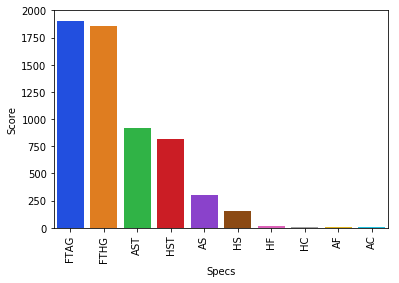

In [6]:
# Barplot feature most important
tmp=Functions.visualize_best_features(tmp)

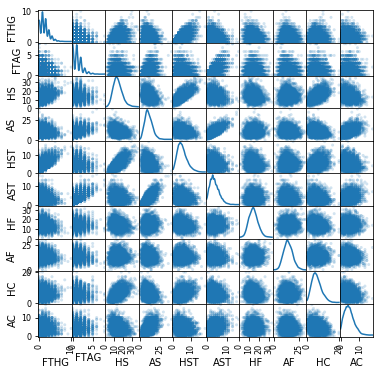

In [7]:
# Explore data
from pandas.plotting import scatter_matrix

spm1 = scatter_matrix(features[['FTHG','FTAG','HS','AS','HST','AST','HF','AF','HC','AC']],
                       alpha=0.2,figsize=(6,6),diagonal = 'kde')

In [8]:
corr = features[['FTHG','FTAG','HS','AS','HST','AST','HF','AF','HC','AC']].corr()
corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

In [9]:
features.describe()

FTHG         FTAG          FTR           HS           AS  \
count  3800.000000  3800.000000  3800.000000  3800.000000  3800.000000   
mean      1.605263     1.141053     0.201053    13.962368    10.926053   
std       1.373028     1.165711     0.849321     5.061809     4.543847   
min       0.000000     0.000000    -1.000000     1.000000     0.000000   
25%       1.000000     0.000000    -1.000000    10.000000     8.000000   
50%       1.000000     1.000000     0.000000    13.000000    10.000000   
75%       2.000000     2.000000     1.000000    17.000000    14.000000   
max      10.000000     8.000000     1.000000    37.000000    39.000000   

               HST          AST           HF           AF           HC  \
count  3800.000000  3800.000000  3800.000000  3800.000000  3800.000000   
mean      5.050789     3.882105    14.331579    14.161842     5.962368   
std       2.669631     2.291887     4.442793     4.339546     2.967651   
min       0.000000     0.000000     1.000000     0.000000     0.000000   
25%       3.000000     2.000000    11.000000    11.000000     4.000000   
50%       5.000000     4.000000    14.000000    14.000000     6.000000   
75%       7.000000     5.000000    17.000000    17.000000     8.000000   
max      18.000000    16.000000    33.000000    31.000000    20.000000   

                AC  
count  3800.000000  
mean      4.463421  
std       2.557520  
min       0.000000  
25%       3.000000  
50%       4.000000  
75%       6.000000  
max      17.000000

In [10]:
#from scipy.stats import describe
#describe(features[['FTHG','FTAG','HS','AS','HST','AST','HF','AF','HC','AC']], axis=0)

import pandas_profiling as pp
eda = pp.ProfileReport(features)
display(eda)


Drop characteristics with less importance

In [11]:
# Drop HC, AC, AS, HS, HF, AF
features = features.drop(['HC','AC','AS','HS','HF','AF'],axis=1)

In [12]:
features.head()

HomeTeam    AwayTeam  FTHG  FTAG  FTR  HST  AST
0  Real Madrid   La Coruna     3     2    1   11    3
1     Zaragoza    Tenerife     1     0    1    8    2
2      Almeria  Valladolid     0     0    0    5    1
3   Ath Bilbao     Espanol     1     0    1    4    1
4       Malaga  Ath Madrid     3     0    1    4    3

# Features Engineering

Taking into account the above, we will take to work the FTAG, FTHG, AST and HST features.
These characteristics will not be present when the prediction is made, therefore we will 
create new characteristics based on these and that can accumulate in some way the values 
of the training.
These new features will be: 

   - TFTG  accumulated - Full Time Home Team Goals
   - TFTA  accumulated - Full Time Away Team Goals

   - GAHT   accumulated - Goals against HomeTeam
   - GAAT   accumulated - Goals against AwayTeam

   - THST   Total - Home Team Shots on Target
   - TAST   Total - Away Team Shots on Target

   - HTP    Home Total Points accumulate
   - ATP    Away Total Points accumulate 

   - HGA    HomeTeam Goal Average
   - AGA    AwayTeam Goal Average

In [13]:
# Feature Engineering
features = features_engineer(features, target)

The statistics of the first week (the first 19 records) must be 0, 
since each team plays only once and does not have any antecedents to calculate it.

In [14]:
features.head(30)

HomeTeam     AwayTeam  FTHG  FTAG  FTR  HST  AST     TFTHG     TFTAG  \
0   Real Madrid    La Coruna     3     2    1   11    3  0.000000  0.000000   
1      Zaragoza     Tenerife     1     0    1    8    2  0.000000  0.000000   
2       Almeria   Valladolid     0     0    0    5    1  0.000000  0.000000   
3    Ath Bilbao      Espanol     1     0    1    4    1  0.000000  0.000000   
4        Malaga   Ath Madrid     3     0    1    4    3  0.000000  0.000000   
5      Mallorca        Xerez     2     0    1    3    3  0.000000  0.000000   
6       Osasuna   Villarreal     1     1    0    2    7  0.000000  0.000000   
7     Santander       Getafe     1     4   -1    3    6  0.000000  0.000000   
8      Valencia      Sevilla     2     0    1    6    1  0.000000  0.000000   
9     Barcelona     Sp Gijon     3     0    1    9    5  0.000000  0.000000   
10   Ath Madrid    Santander     1     1    0   10    3  0.000000  0.000000   
11      Espanol  Real Madrid     0     3   -1    3    6  0.000000  0.000000   
12       Getafe    Barcelona     0     2   -1    3    9  0.000000  0.000000   
13      Sevilla     Zaragoza     4     1    1    8    2  0.000000  0.000000   
14    La Coruna       Malaga     1     0    1    4    2  0.000000  0.000000   
15     Sp Gijon      Almeria     1     0    1    4    0  0.000000  0.000000   
16     Tenerife      Osasuna     2     1    1    5    3  0.000000  0.000000   
17   Valladolid     Valencia     2     4   -1    9    6  0.000000  0.000000   
18   Villarreal     Mallorca     1     1    0    5    4  0.000000  0.000000   
19        Xerez   Ath Bilbao     0     1   -1    4    5 -1.076529 -1.072012   
20    Barcelona   Ath Madrid     5     2    1    6    4 -1.051111 -1.072012   
21    La Coruna      Espanol     2     3   -1    4    6 -1.061278 -1.077092   
22       Malaga    Santander     1     2   -1    6    3 -1.061278 -1.066932   
23     Mallorca     Tenerife     4     0    1    9    2 -1.061278 -1.066932   
24      Osasuna      Sevilla     0     2   -1    3    4 -1.066362 -1.056772   
25      Almeria       Getafe     1     0    1    3   11 -1.076529 -1.056772   
26   Ath Bilbao   Villarreal     3     2    1    9    6 -1.066362 -1.066932   
27  Real Madrid        Xerez     5     0    1   13    3 -1.046027 -1.077092   
28     Valencia     Sp Gijon     2     2    0   10    5 -1.046027 -1.072012   
29     Zaragoza   Valladolid     1     2   -1    5    4 -1.066362 -1.066932   

        GAHT  ...       HTP       ATP       HGA       AGA  diffg  diffp  \
0   0.000000  ...  0.000000  0.000000  0.000000  0.000000    0.0    0.0   
1   0.000000  ...  0.000000  0.000000  0.000000  0.000000    0.0    0.0   
2   0.000000  ...  0.000000  0.000000  0.000000  0.000000    0.0    0.0   
3   0.000000  ...  0.000000  0.000000  0.000000  0.000000    0.0    0.0   
4   0.000000  ...  0.000000  0.000000  0.000000  0.000000    0.0    0.0   
5   0.000000  ...  0.000000  0.000000  0.000000  0.000000    0.0    0.0   
6   0.000000  ...  0.000000  0.000000  0.000000  0.000000    0.0    0.0   
7   0.000000  ...  0.000000  0.000000  0.000000  0.000000    0.0    0.0   
8   0.000000  ...  0.000000  0.000000  0.000000  0.000000    0.0    0.0   
9   0.000000  ...  0.000000  0.000000  0.000000  0.000000    0.0    0.0   
10  0.000000  ...  0.000000  0.000000  0.000000  0.000000    0.0    0.0   
11  0.000000  ...  0.000000  0.000000  0.000000  0.000000    0.0    0.0   
12  0.000000  ...  0.000000  0.000000  0.000000  0.000000    0.0    0.0   
13  0.000000  ...  0.000000  0.000000  0.000000  0.000000    0.0    0.0   
14  0.000000  ...  0.000000  0.000000  0.000000  0.000000    0.0    0.0   
15  0.000000  ...  0.000000  0.000000  0.000000  0.000000    0.0    0.0   
16  0.000000  ...  0.000000  0.000000  0.000000  0.000000    0.0    0.0   
17  0.000000  ...  0.000000  0.000000  0.000000  0.000000    0.0    0.0   
18  0.000000  ...  0.000000  0.000000  0.000000  0.000000    0.0    0.0   
19 -1.435386  ... -1.149498 -1.134959 -0.185973 -0.168647

In [15]:
features.tail()

HomeTeam    AwayTeam  FTHG  FTAG  FTR  HST  AST     TFTHG     TFTAG  \
3795      Levante  Ath Madrid     2     2    0    7    8  0.662065  2.097812   
3796      Sevilla  Ath Bilbao     2     0    1    3    1  1.983803  1.478071   
3797   Valladolid    Valencia     0     2   -1    4    6 -0.283486  1.899698   
3798        Eibar   Barcelona     2     2    0    8    3  0.077450  4.241507   
3799  Real Madrid       Betis     0     2   -1    2    7  4.124003  0.533219   

          GAHT  ...       HTP       ATP       HGA       AGA  diffg  diffp  \
3795  2.127058  ...  0.756550  2.774114 -0.997152  1.799745   -0.5  -0.50   
3796  2.522885  ...  2.088617  1.837452  0.451878 -0.050820    0.5   0.25   
3797  0.326433  ... -0.304772  2.178549 -0.678227  0.746240   -0.5  -0.50   
3798  0.605840  ...  0.090516  3.867788 -0.435567  5.022641   -0.5  -0.50   
3799  1.506153  ...  3.610206  0.575937  4.278981 -0.882535    0.5   0.50   

      diffshots  diffgoals   HTgoals   ATgoals  
3795      -0.50      -0.50 -0.532483  1.433217  
3796       0.25       0.25  0.157120 -0.532962  
3797      -0.50      -0.50 -0.532483  2.454519  
3798      -0.50      -0.50 -0.532483  5.164095  
3799       0.50       0.50  4.385297 -0.532962  

[5 rows x 23 columns]

The new features have the expected importance to train the model, 
remember that the statistics of the game know them after its completion, 
therefore you must work with the data prior to the game, 
this way we can now eliminate those characteristics that "No we must use":
These are: 
    FTAG, FTHG, AST, HST

# Split Train and Test
We can not use the sklearn methods to perform the "splits", since we are working with time series and can not choose random data

In [16]:
# Choose the characteristics for learning and testing
cols = ['TFTHG','TFTAG', 'GAHT', 'GAAT','HGA','AGA','HTP','ATP',
        'diffgoals','diffshots','diffp','diffg']

# Amount of the test 10%, 90% Train
n = 400     # record for the test

# Split feature_table: Training (only the matches already played)
X_train = features[cols]
X_train = X_train[:-n] # Eliminate the last n rows, (nrows - n) for training

# Split target Train: only the matches already played
y_train = target[:-n] # Eliminate the last n rows, (nrows - n) for training


# Split feature_table: Test (only the games not played)
X_test = features[cols]
X_test = X_test[features.shape[0]-n:] # n rows for the test

# Split target test: only the games not played
y_test = target[target.shape[0]-n:]

# Construction of the models
We will start testing the following models:
    - LogisticRegression
    - xgboost
    - KNeighbors
    - SVC
    - Decision Tree 
    - Random Forest
    - AdaBoost
    - Gradient Boosting
    
For the metrics we will use:
    - f1 Score
    - Cross Val Score
    
For the tuning:
    - GridSearchCV
    
And finally: we will use the "Stacking" technique to try to improve the accuracy

# Training and test models

In [17]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

f1_scores = dict()

classifiers = [
    LogisticRegression(random_state=12),
    XGBClassifier(random_state=12),
    KNeighborsClassifier(3),
    SVC(random_state = 42, kernel='rbf', gamma='auto',probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier()]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "F1 Score"]
scores = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf_name = clf.__class__.__name__
    
    print("-"*82+"\n")
    print("Clasifier: " + clf_name)
    print('****Results****')

    y_predict_test = clf.fit(X_train, y_train).predict(X_test)
    
    # Accuracy
    acc=accuracy_score(y_test, y_predict_test)
    print("Accuracy Score: " + str(round(100*acc, 2)) + "% \n")

    # F1 Scores
    f1s = f1_score(y_test, y_predict_test, average='weighted')
    print("f1 Score: " + str(round(100 * f1s, 2)) + "% \n")
    
    train_predictions = y_predict_test
    log_entry = pd.DataFrame([[clf_name, acc, f1s ]], columns=log_cols)
    scores = scores.append(log_entry)
    
print("-"*82)

----------------------------------------------------------------------------------

Clasifier: LogisticRegression
****Results****
Accuracy Score: 47.5% 

f1 Score: 39.99% 

----------------------------------------------------------------------------------

Clasifier: XGBClassifier
****Results****
Accuracy Score: 46.25% 

f1 Score: 40.38% 

----------------------------------------------------------------------------------

Clasifier: KNeighborsClassifier
****Results****
Accuracy Score: 40.5% 

f1 Score: 39.33% 

----------------------------------------------------------------------------------

Clasifier: SVC
****Results****
Accuracy Score: 50.25% 

f1 Score: 40.56% 

----------------------------------------------------------------------------------

Clasifier: DecisionTreeClassifier
****Results****
Accuracy Score: 40.25% 

f1 Score: 40.42% 

----------------------------------------------------------------------------------

Clasifier: RandomForestClassifier
****Results****
Accuracy Sco

# Visualize the Accuracy Metric

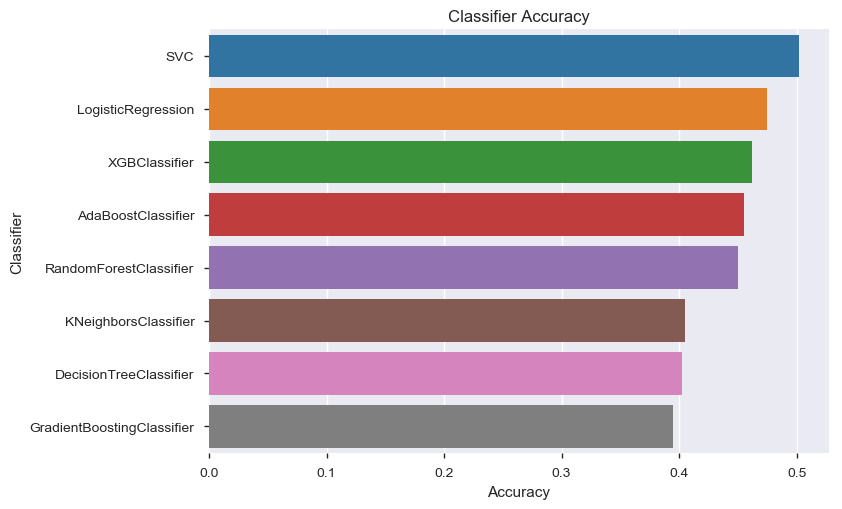

In [18]:
import seaborn as sns
sns.barplot(x='Accuracy', y='Classifier', data=scores.sort_values(by='Accuracy', ascending = False))
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')
plt.show()

# Visualize the F1 Score Metric

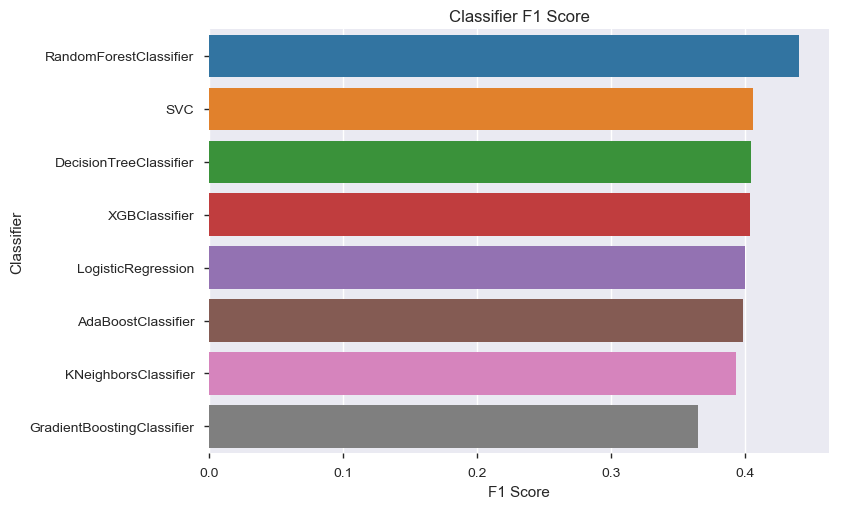

In [19]:
sns.barplot(x='F1 Score', y='Classifier', 
            data=scores.sort_values(by='F1 Score', ascending = False))

plt.xlabel('F1 Score')
plt.title('Classifier F1 Score')
plt.show()

# Visualize Accuracy Vs F1 Score

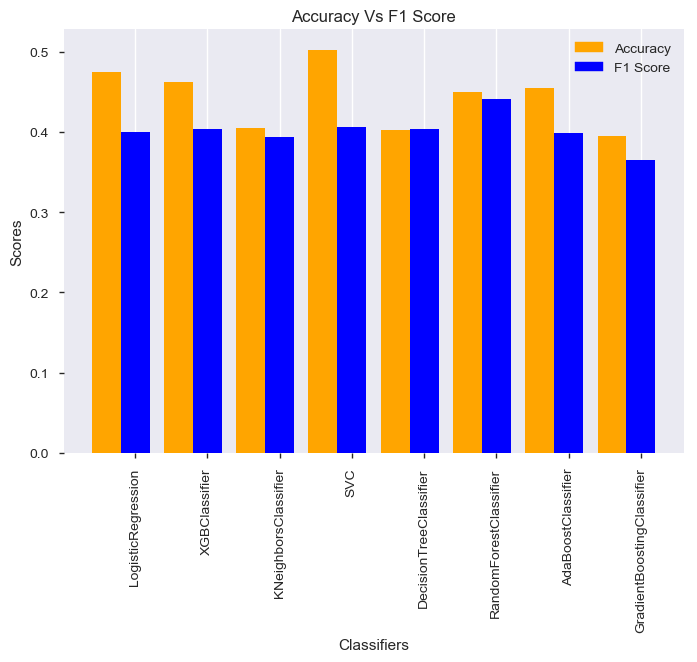

In [20]:
import matplotlib.patches as mpatches
x = np.arange(len(scores))
bar_width = 0.4
plt.bar(x, scores['Accuracy'], width = bar_width, color = 'orange', zorder=2)
plt.bar(x + bar_width, scores['F1 Score'], width = bar_width, color = 'blue', zorder=2)

plt.xticks(x + bar_width, scores['Classifier'], rotation='vertical')
plt.title('Accuracy Vs F1 Score')
plt.xlabel('Classifiers')
plt.ylabel('Scores')

orange_patch = mpatches.Patch(color='orange', label='Accuracy')
blue_patch = mpatches.Patch(color='blue', label='F1 Score')

plt.legend(handles=[orange_patch,blue_patch])

plt.grid(axis='y')
plt.show()

# The best models (without tuning) are:

Clasifier: SVC
****Results****
Accuracy Score: 50.25% 
f1 Score: 40.56% 

Clasifier: XGBClassifier
****Results****
Accuracy Score: 46.25% 
f1 Score: 40.38%

Clasifier: LogisticRegression
****Results****
Accuracy Score: 47.5% 
f1 Score: 39.99% 

Clasifier: AdaBoostClassifier
****Results****
Accuracy Score: 45.5% 
f1 Score: 39.82% 

# Tuning using GridSearchCV

According to the above, I will take the best classifiers to optimize them:
    - LogisticRegression
    - XGBClassifier
    - SVC
    - AdaBoostClassifier

In [21]:
# Models for GridSearchCV

models = [{'name': 'Logistic Regression','label': 'Logistic Regression',
           'classifier': LogisticRegression(random_state=49),
           'grid': {'penalty':['l2'],
                    'C':[5,6,7],
                    'solver':['newton-cg','lbfgs','sag','saga'],
                    'max_iter':[100],
                    'multi_class':['ovr','multinomial']}},
          
          {'name': 'Xgboost','label':'Xgboost',
           'classifier': XGBClassifier(random_state=49),
           'grid':{'seed':[0],
                   'n_estimators':[5,10,20],
                   'learning_rate':[0.1],
                   'subsample':[0.8, 0.9],
                   'objective':['binary:logistic'],
                   'max_depth':[2,3,4],
                   'gamma':[1,2,3],
                   'min_child_weight':[2,3,4]}},
          
          {'name': 'SVC (RBF)', 'label': 'SVC (RBF)',
           'classifier': SVC(random_state=49, probability=True ),
           'grid': {'C': [9,10],
                    'gamma': [0.01, 0.001],
                    'kernel': ['linear','rbf','poly','sigmoid']}},
          
          {'name': 'AdaBoost', 'label': 'AdaBoost Classifier',
           'classifier':AdaBoostClassifier(learning_rate=1,
                                           random_state=49),
           'grid': {'n_estimators': [2,4,6],
                    'algorithm':['SAMME','SAMME.R'] }}]


In [22]:
def model_selection(classifier, name, grid, X_train, y_train, X_test, y_test, scoring1, scoring2):
    
    gridsearch_cv1=GridSearchCV(classifier, 
                               grid,
                               cv=5, 
                               scoring = scoring1)
    
    gridsearch_cv2=GridSearchCV(classifier, 
                               grid,
                               cv=5, 
                               scoring = scoring2)
    
    gridsearch_cv1.fit(X_train, y_train)
    gridsearch_cv2.fit(X_train, y_train)
    
    results_dict = {} # Scores with data training
    
    results_dict['classifier_name'] = name    
    results_dict['classifier'] = gridsearch_cv1.best_estimator_
    results_dict['best_params'] = gridsearch_cv1.best_params_
    
    # Traininig Scores
    results_dict['accuracy-train'] = gridsearch_cv1.best_score_
    results_dict['f1 score-train'] = gridsearch_cv2.best_score_

    # Test Scores    
    y_pred = gridsearch_cv1.best_estimator_.predict(X_test)
    results_dict['accuracy-test'] = accuracy_score(y_test, y_pred, 'accuracy')
    
    y_pred = gridsearch_cv2.best_estimator_.predict(X_test)
    results_dict['f1 score-test'] = f1_score(y_test, y_pred, average='weighted')
    
    return(results_dict)

results = []

for mod in models:    
    print(mod['name'], ".....")    
    results.append(model_selection(mod['classifier'], 
                                   mod['name'],
                                   mod['grid'],
                                   X_train, 
                                   y_train, 
                                   X_test,
                                   y_test,
                                   'accuracy',
                                   'f1_weighted'))      
    print('....ready ', mod['name'])

Logistic Regression .....
....ready  Logistic Regression
Xgboost .....
....ready  Xgboost
SVC (RBF) .....
....ready  SVC (RBF)
AdaBoost .....
....ready  AdaBoost


In [23]:
results_df = pd.DataFrame(results).sort_values(by='accuracy-test', ascending = False)

In [24]:
results_df

accuracy-test  accuracy-train  \
1         0.4950        0.545000   
2         0.4925        0.535588   
0         0.4775        0.543529   
3         0.4750        0.532647   

                                         best_params  \
1  {'gamma': 2, 'learning_rate': 0.1, 'max_depth'...   
2         {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}   
0  {'C': 6, 'max_iter': 100, 'multi_class': 'ovr'...   
3        {'algorithm': 'SAMME.R', 'n_estimators': 6}   

                                          classifier      classifier_name  \
1  XGBClassifier(base_score=0.5, booster='gbtree'...              Xgboost   
2  SVC(C=10, cache_size=200, class_weight=None, c...            SVC (RBF)   
0  LogisticRegression(C=6, class_weight=None, dua...  Logistic Regression   
3  (DecisionTreeClassifier(class_weight=None, cri...             AdaBoost   

   f1 score-test  f1 score-train  
1       0.401157        0.457168  
2       0.391570        0.427528  
0       0.406761        0.460004  
3       0.393363        0.449138

In [25]:
results_df[['classifier_name','accuracy-train','accuracy-test','f1 score-train','f1 score-test']]

classifier_name  accuracy-train  accuracy-test  f1 score-train  \
1              Xgboost        0.545000         0.4950        0.457168   
2            SVC (RBF)        0.535588         0.4925        0.427528   
0  Logistic Regression        0.543529         0.4775        0.460004   
3             AdaBoost        0.532647         0.4750        0.449138   

   f1 score-test  
1       0.401157  
2       0.391570  
0       0.406761  
3       0.393363

In [26]:
xgb_params = results_df[results_df['classifier_name'] == 'Xgboost'].best_params.values
lr_params = results_df[results_df['classifier_name'] == 'Logistic Regression'].best_params.values
svc_params = results_df[results_df['classifier_name'] == 'SVC (RBF)'].best_params.values
ada_params = results_df[results_df['classifier_name'] == 'AdaBoost'].best_params.values

In [27]:
print("xgb_params: ", xgb_params, "\n\n",
      "lr_params: ", lr_params, "\n\n",
      "svc_params: ", svc_params, "\n\n",
      "ada_params: ", ada_params, "\n")

xgb_params:  [{'gamma': 2, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 4, 'n_estimators': 10, 'objective': 'binary:logistic', 'seed': 0, 'subsample': 0.9}] 

 lr_params:  [{'C': 6, 'max_iter': 100, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'lbfgs'}] 

 svc_params:  [{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}] 

 ada_params:  [{'algorithm': 'SAMME.R', 'n_estimators': 6}] 



# Results Tuning

# Best Classifiers after tuning (accuracy-test set):

    - XgBoost, accuracy: 0.4950 
    - SVC, accuracy: 0.4925 
    - Logistic regression, accuracy: 0.4775	 
    - AdaBoostClassifier, accuracy: 0.4750 

# Best Classifiers after tuning (accuracy-training set):

    - XgBoost, accuracy: 0.557059 
    - Logistic regression, accuracy: 0.548529	
    - AdaBoostClassifier, accuracy: 0.540588
    - SVC, accuracy: 0.533529	 

# Stacking
To try to improve the accuracy we will use the technique of "Stacking"

We will use the following models in the layers:
    
    - XgBoost
    - LogisticRegression
    - SVC
    - AdaBoostClassifier
    
And as a last layer (similar to 'softmax') we will use LogisticRegression 

In [28]:
from mlens.ensemble import SuperLearner
from mlens.ensemble import Subsemble
from mlens.metrics.metrics import rmse

def f1(y, p): return f1_score(y, p, average='weighted')

ensemble = SuperLearner(scorer=f1, random_state=49, verbose=True)

ensemble.add([XGBClassifier(gamma=2, 
                            learning_rate=0.1,
                            max_depth=3,
                            min_child_weight=4,
                            n_estimators=10,
                            objective='binary:logistic',
                            seed=0,
                            subsample=0.9)])

ensemble.add([LogisticRegression(C=6, 
                                 max_iter=100, 
                                 multi_class='ovr', 
                                 penalty='l2', 
                                 solver='lbfgs', 
                                 random_state=49)])
ensemble.add([SVC(C=10, 
                  gamma=0.001, 
                  kernel='rbf',
                  random_state=49)])

ensemble.add([AdaBoostClassifier(algorithm='SAMME.R', 
                                 n_estimators=6,
                                 random_state=49)])


ensemble.add_meta([LogisticRegression(C=6, 
                                 max_iter=100, 
                                 multi_class='ovr', 
                                 penalty='l2', 
                                 solver='lbfgs', 
                                 random_state=49)])

ensemble.fit(X_train, y_train)
preds = ensemble.predict(X_test)
f1(y_test, preds)
accuracy_score(y_test, preds)


Fitting 5 layers


[MLENS] backend: threading


Fit complete                        | 00:00:00

Predicting 5 layers
Predict complete                    | 00:00:00


0.495

## The tacking technique obtained the same accuracy as the best of the models (XgBoost): 0.52

# Cross Validation with Times Series

In [47]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import TimeSeriesSplit
import random

X = features[cols]
y = target

# With Differents random
splits = 3
samples = 7

mean_scores = 0.00
varian_scores = 0.00

for i in range(0,samples):
    r = random.randint(1,2000)
    tsv = TimeSeriesSplit(n_splits=splits).split(X)
    clf = XGBClassifier(random_state= r,
                        gamma=2, 
                        learning_rate=0.1,
                        max_depth=3,
                        min_child_weight=4,
                        n_estimators=10,
                        objective='binary:logistic',
                        seed=None,
                        subsample=0.9)
    scores = cross_val_score(clf, X, y, cv=tsv, scoring='accuracy')
    
    for s in range(0, splits):
        mean_scores += scores[s]
        varian_scores += scores.std()*2
        
    
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2), " with Random: ", r)

print("Mean Scores: %0.2f" % (t_scores/(samples*splits)))
print("Mean Variance: %0.2f" % (varian_scores/(samples*splits)))    

Accuracy: 0.52 (+/- 0.05)  with Random:  59
Accuracy: 0.52 (+/- 0.03)  with Random:  471
Accuracy: 0.53 (+/- 0.02)  with Random:  334
Accuracy: 0.52 (+/- 0.04)  with Random:  1574
Accuracy: 0.52 (+/- 0.02)  with Random:  556
Accuracy: 0.52 (+/- 0.01)  with Random:  519
Accuracy: 0.52 (+/- 0.03)  with Random:  1727
Mean Scores: 0.52
Mean Variance: 0.03


### Our model has 0.52 and a very small variation of 0.03, which is very consistent with the proposed Benchmark

# Feature Importance in Gradient Boosting

In [53]:
#
# Features
# cols = ['TFTHG','TFTAG', 'GAHT', 'GAAT','HGA','AGA','HTP','ATP', 'diffgoals','diffshots','diffp','diffg']
#            1       2       3       4      5     6     7     8        9           10        11       12
#
 
clf = XGBClassifier(random_state= 49,
                        gamma=2, 
                        learning_rate=0.1,
                        max_depth=3,
                        min_child_weight=4,
                        n_estimators=10,
                        objective='binary:logistic',
                        seed=None,
                        subsample=0.9)

y_predict_test = clf.fit(X_train, y_train).predict(X_test)


print("Features:", clf.feature_importances_)

Features: [0.04639175 0.06185567 0.06701031 0.06701031 0.24226804 0.24742268
 0.04123711 0.06701031 0.04123711 0.         0.         0.1185567 ]


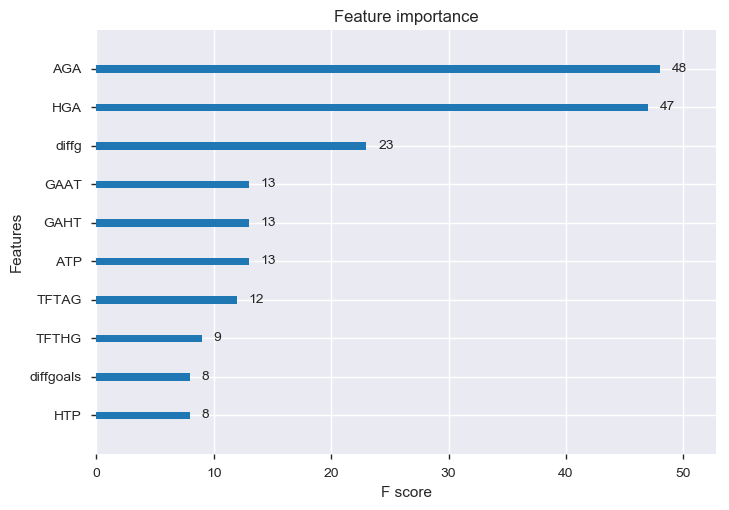

In [55]:
from matplotlib import pyplot
from xgboost import plot_importance
plot_importance(clf)
pyplot.show()

In [56]:
from numpy import loadtxt
from numpy import sort
from sklearn.feature_selection import SelectFromModel

predictions = [round(value) for value in y_predict_test]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# Fit model using each importance as a threshold
thresholds = sort(clf.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(clf, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    # train model
    selection_model = XGBClassifier(random_state= 49,
                        gamma=2, 
                        learning_rate=0.1,
                        max_depth=3,
                        min_child_weight=4,
                        n_estimators=10,
                        objective='binary:logistic',
                        seed=None,
                        subsample=0.9)
    
    
    selection_model.fit(select_X_train, y_train)
    # eval model
    select_X_test = selection.transform(X_test)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Accuracy: 49.75%
Thresh=0.000, n=12, Accuracy: 49.75%
Thresh=0.000, n=12, Accuracy: 49.75%
Thresh=0.041, n=10, Accuracy: 49.75%
Thresh=0.041, n=10, Accuracy: 49.75%
Thresh=0.046, n=8, Accuracy: 48.50%
Thresh=0.062, n=7, Accuracy: 50.00%
Thresh=0.067, n=6, Accuracy: 48.00%
Thresh=0.067, n=6, Accuracy: 48.00%
Thresh=0.067, n=6, Accuracy: 48.00%
Thresh=0.119, n=3, Accuracy: 47.75%
Thresh=0.242, n=2, Accuracy: 48.50%
Thresh=0.247, n=1, Accuracy: 47.25%


# With n=7 is the best Accuracy: Thresh=0.062, n=7, Accuracy: 50.00%

# SHAP (Explanations of SHapley Additive) Explanation of the result in XGBoost. Attribution of additive characteristics coherent and locally accurate based on expectations.

In [57]:
import shap
import xgboost

# load JS visualization code to notebook
shap.initjs()

model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X_train, label=y_train), 100)

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

[23:50:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=6
[23:50:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=6
[23:50:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=6
[23:50:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=6
[23:50:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=6
[23:50:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=6
[23:50:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=6
[23:50:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=6
[23:50:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned no

In [58]:
# visualize the training set predictions
shap.force_plot(explainer.expected_value, shap_values, X_train)

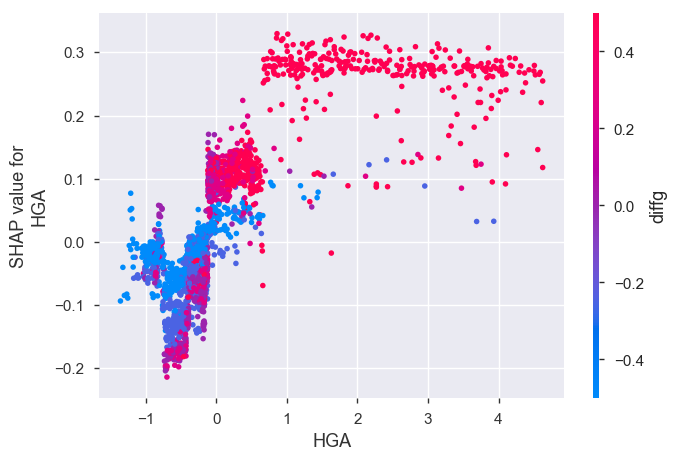

In [62]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("HGA", shap_values, X_train)

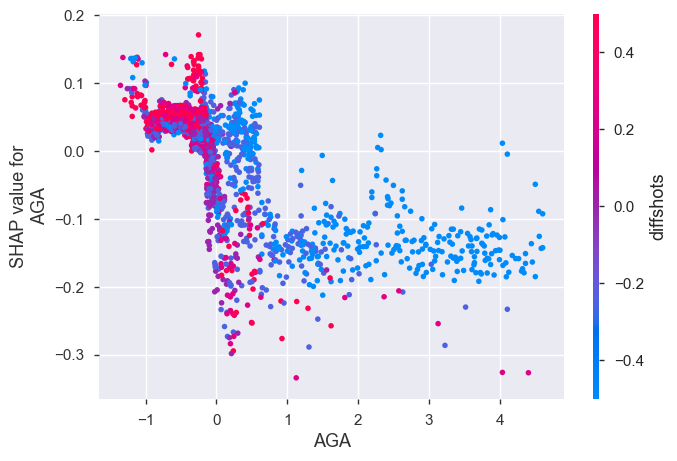

In [63]:
shap.dependence_plot("AGA", shap_values, X_train)

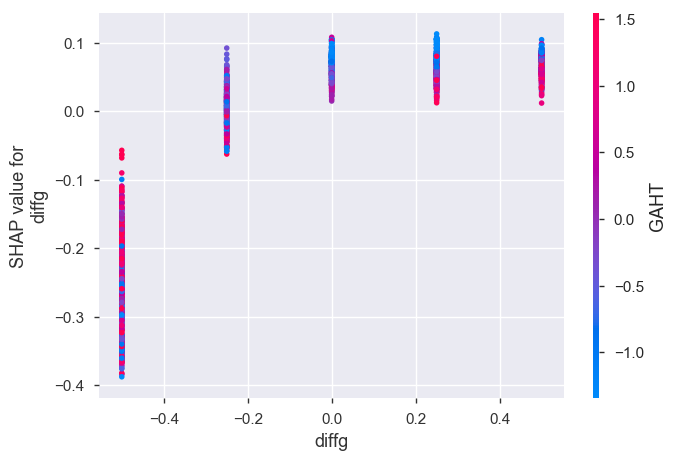

In [64]:
shap.dependence_plot("diffg", shap_values, X_train)

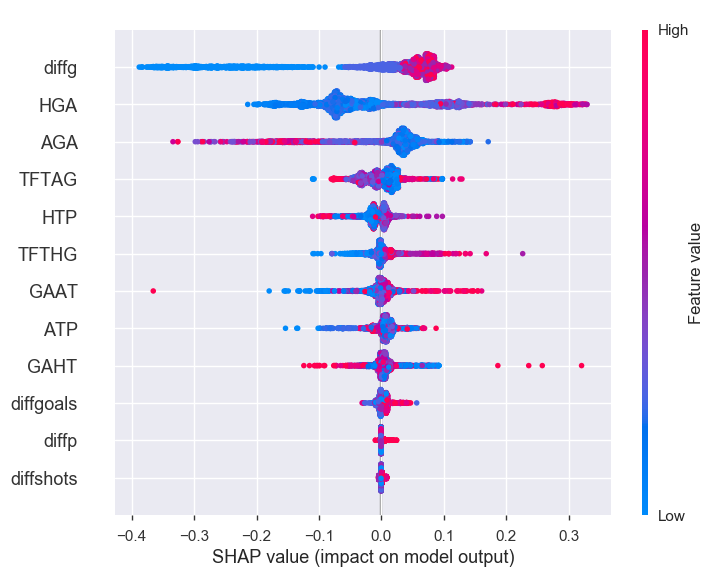

In [60]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X_train)

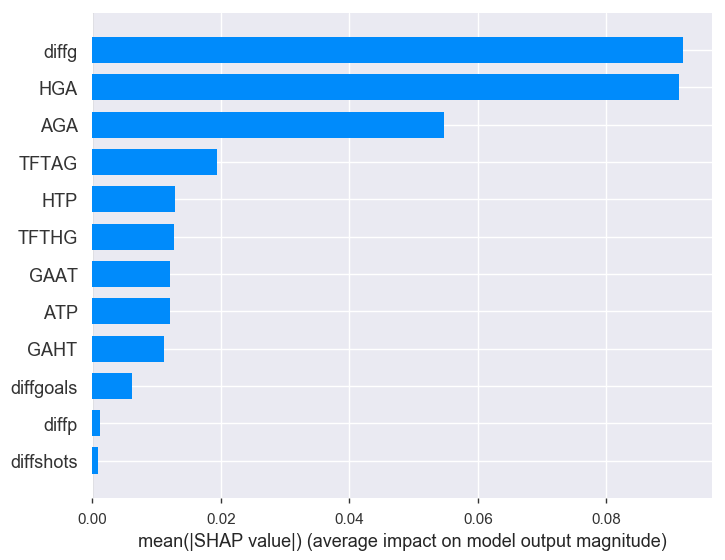

In [61]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

# Conclusion: 

## The best of the models is XgBoost: 0.52 in Cross Validation, 0.50 with "SelectFromModel" technique and the most important characteristics for the model are 'HGA', 'AGA' and 'diffg'